In [145]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# Left join our web data with Amsterdam neighborhoods based on postal code

postal_code = pd.read_csv("D:\Portfolio\WebScraping\Pararius\AmsterdamNeighborhood.csv",dtype={'zipcode_num': 'object'})
pararuis_data = pd.read_csv("D:\Portfolio\WebScraping\Pararius\pararius_refined.csv")
pararuis_data['zipcode_num'] = pararuis_data.zipcode.str[:4]
df = pd.merge(pararuis_data,postal_code,how='left',on='zipcode_num')


In [147]:
# Write function for take a first look at df

def initial_description(df):
    print('Rows and Columns :', df.shape)
    print('Data types :')
    print(df.dtypes)
    print('Data Describe :')
    print(df.describe())
    print('Null Count :')
    print(df.isnull().sum())
    return df.head()
initial_description(df)

Rows and Columns : (824, 12)
Data types :
title                  object
type                   object
interior               object
address                object
zipcode                object
city                   object
district               object
area_square_meter       int64
room                    int64
monthly_price_euro    float64
zipcode_num            object
Neighborhood           object
dtype: object
Data Describe :
       area_square_meter        room  monthly_price_euro
count         824.000000  824.000000          823.000000
mean           95.723301    3.229369         2687.017011
std            46.637415    1.269154         1361.018390
min            28.000000    1.000000          655.000000
25%            65.000000    2.000000         1850.000000
50%            85.000000    3.000000         2350.000000
75%           114.000000    4.000000         2997.500000
max           450.000000   12.000000        13000.000000
Null Count :
title                 0
type              

,title,type,interior,address,zipcode,city,district,area_square_meter,room,monthly_price_euro,zipcode_num,Neighborhood
0,Apartment Prinsengracht,Apartment,Upholstered or furnished,Prinsengracht,1015DR,Amsterdam,Grachtengordel-West,104,3,3750.0,1015,Binnenstad en Oostelijk Havengebied
1,Apartment Raadhuisstraat,Apartment,Not Mentioned,Raadhuisstraat,1016DE,Amsterdam,Grachtengordel-West,70,4,2150.0,1016,Binnenstad en Oostelijk Havengebied
2,Apartment Eerste Jan van der Heijdenstraat 111 1A,Apartment,Furnished,Eerste Jan van der Heijdenstraat 111 1A,1072TN,Amsterdam,Oude Pijp,33,2,1600.0,1072,Zuid
3,Apartment Kikkenstein 3734,Apartment,Not Mentioned,Kikkenstein 3734,1104TW,Amsterdam,"Bijlmer Oost E,G,K",94,4,1550.0,1104,Zuidoost
4,Apartment Geuzenstraat 74,Apartment,Not Mentioned,Geuzenstraat 74,1056KG,Amsterdam,Geuzenbuurt,87,3,2500.0,1056,West


In [148]:
#Remove null recoeds

df = df.dropna(subset=['monthly_price_euro'])

In [149]:
# Remove irrelevant columns

df.drop(['city','title','address','zipcode','district'],axis= 1,inplace=True)

In [150]:
df.head()

,type,interior,area_square_meter,room,monthly_price_euro,zipcode_num,Neighborhood
0,Apartment,Upholstered or furnished,104,3,3750.0,1015,Binnenstad en Oostelijk Havengebied
1,Apartment,Not Mentioned,70,4,2150.0,1016,Binnenstad en Oostelijk Havengebied
2,Apartment,Furnished,33,2,1600.0,1072,Zuid
3,Apartment,Not Mentioned,94,4,1550.0,1104,Zuidoost
4,Apartment,Not Mentioned,87,3,2500.0,1056,West


In [151]:
df.type.value_counts()

Apartment    766
House         46
Studio        11
Name: type, dtype: int64

In [152]:
df.interior.value_counts()

Furnished                   394
Upholstered                 242
Not Mentioned               114
Upholstered or furnished     65
Shell                         8
Name: interior, dtype: int64

In [153]:
# Based on domain knowledge replace all "Not Mentioned" and "Shell" values in interior column with "Unfernished"

df.interior.replace(['Not Mentioned','Shell'],'Unfernished',inplace=True)

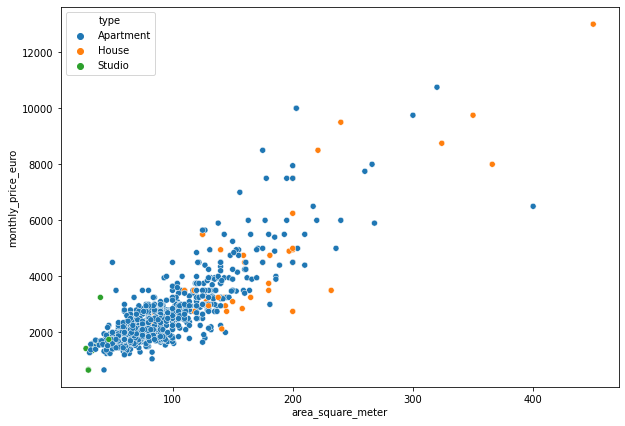

In [154]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.area_square_meter,y=df.monthly_price_euro,hue=df.type)
plt.show()

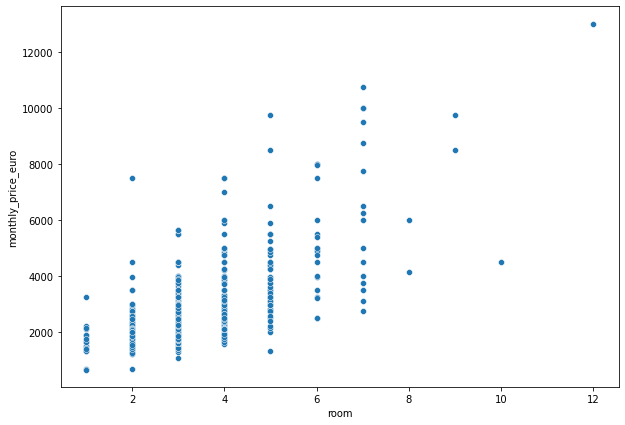

In [155]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.room,y=df.monthly_price_euro)
plt.show()

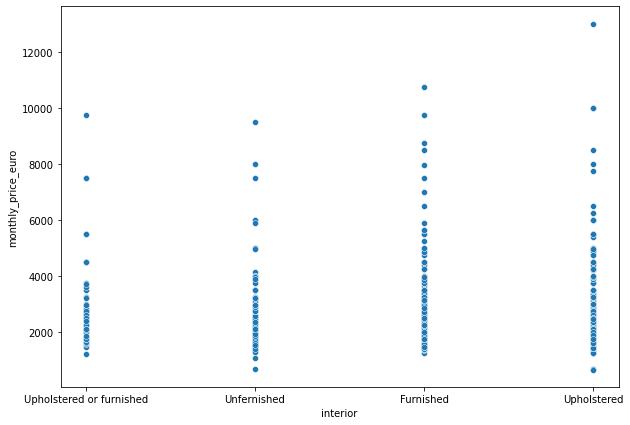

In [156]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.interior,y=df.monthly_price_euro)
plt.show()

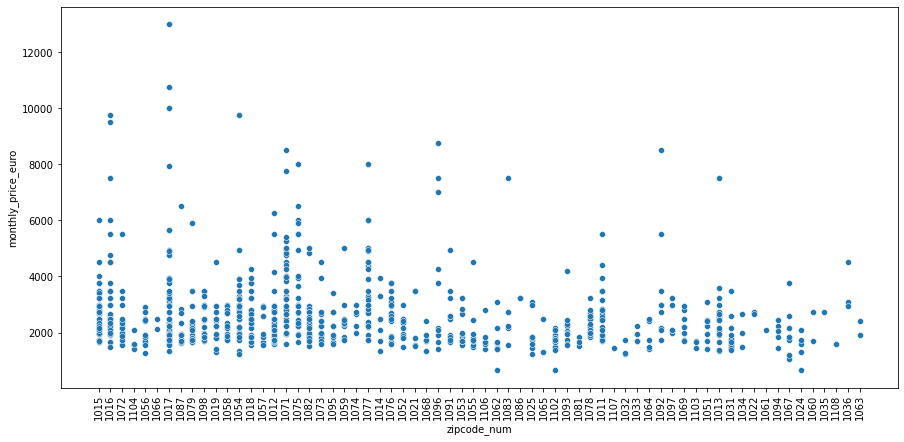

In [157]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df.zipcode_num,y=df.monthly_price_euro)
plt.xticks(rotation=90)
plt.show()

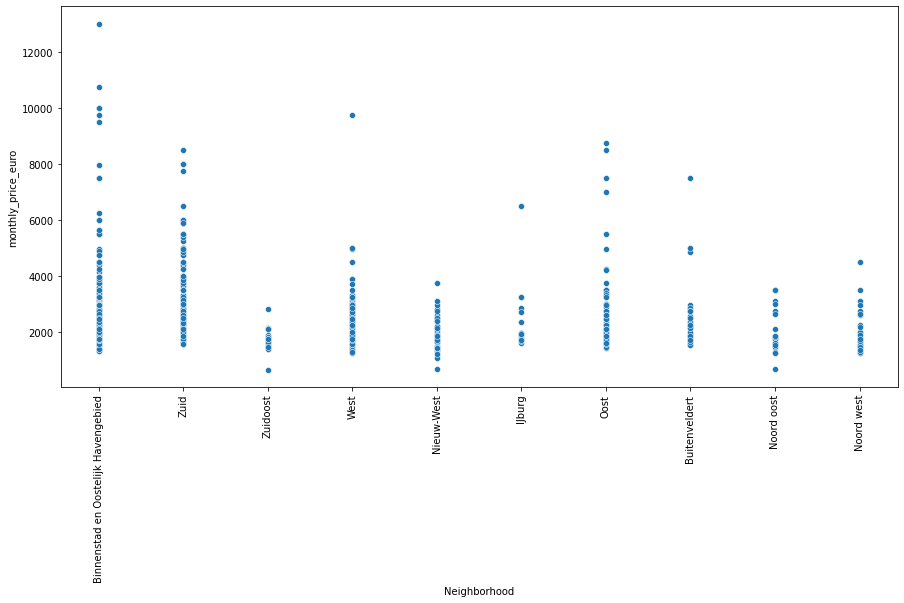

In [158]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df.Neighborhood,y=df.monthly_price_euro)
plt.xticks(rotation=90)
plt.show()

In [159]:
from pandas_profiling import ProfileReport

In [160]:
# profile = ProfileReport(df= df,explorative=True)
# profile.to_widgets()

In [161]:
new_df = df.copy()

In [162]:
new_df = new_df[['type','interior','Neighborhood','room','area_square_meter','monthly_price_euro']]

In [163]:
new_df.head()

,type,interior,Neighborhood,room,area_square_meter,monthly_price_euro
0,Apartment,Upholstered or furnished,Binnenstad en Oostelijk Havengebied,3,104,3750.0
1,Apartment,Unfernished,Binnenstad en Oostelijk Havengebied,4,70,2150.0
2,Apartment,Furnished,Zuid,2,33,1600.0
3,Apartment,Unfernished,Zuidoost,4,94,1550.0
4,Apartment,Unfernished,West,3,87,2500.0


In [164]:
#Label encoding

type_encode = pd.get_dummies(new_df.type)
interior_encode = pd.get_dummies(new_df.interior)
Neighborhood_encode = pd.get_dummies(new_df.Neighborhood)
new_df = pd.concat([type_encode,interior_encode,Neighborhood_encode,new_df],axis=1)
new_df.drop(['type','interior','Neighborhood'],axis=1,inplace=True)

In [169]:
#Remove outliers

new_df = new_df[new_df['area_square_meter']<200]
new_df = new_df[new_df['monthly_price_euro']<4500]



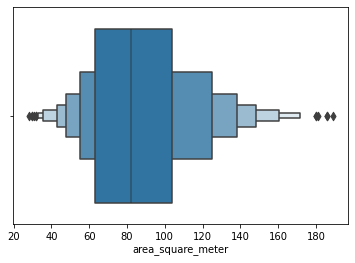

In [170]:
sns.boxenplot(x= new_df.area_square_meter)
plt.show()

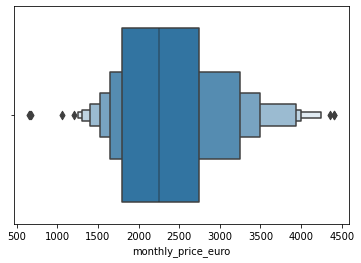

In [171]:
sns.boxenplot(x= new_df.monthly_price_euro)
plt.show()

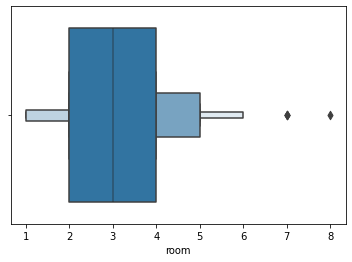

In [172]:
sns.boxenplot(x= new_df.room)
plt.show()

In [173]:
# split data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = new_df.iloc[:,:(len(new_df.columns)-1)]
y = new_df.iloc[:,(len(new_df.columns)-1)]
#X = StandardScaler().fit_transform(X)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=False)

In [174]:
# Linear Regression
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
y_pred = Lreg.predict(X_test)

In [175]:
# model evaluation
from sklearn import metrics
R_square = metrics.r2_score(y_test,y_pred)
RMSE = metrics.mean_squared_error(y_test,y_pred)
R_square

0.7349877191050793

In [176]:
# XGBoost model
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
metrics.r2_score(y_test,y_pred_xgb)

0.4214755434913827

In [177]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)
metrics.r2_score(y_test,y_pred_lasso)


0.7324562993373679

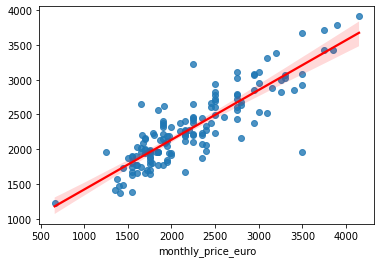

In [178]:
sns.regplot(x=y_test,y=y_pred_lasso,line_kws={"color": "red"})
plt.show()

In [179]:
# Check one sample

x_check = pd.read_csv("D:\Portfolio\WebScraping\Pararius\check.csv")
y_check = lasso.predict(x_check)
y_check

array([2716.94666088])

In [180]:
#Create pickle file

import pickle

file = open('D:/Portfolio/WebScraping/Pararius/amsterdam_rent_prediction.pkl','wb')
pickle.dump(lasso,file)
file.close()